<div style='text-align: center;'>
<h1>South Korean Pollution Data Analysis</h1>
</div>
An EDA project that explores the different pollution data in South Korea.

---

The dataset has the data of various pollutants acorss provinces, districts and cities including latitudes and longitude values.The data has 12 columns and 34529 records excluding header row. The data was a day to day time-series dataset. The columns includes,
<ol>Columns:-
<li>Date: These are the dates of pollution reading
<li>Province: Province of which the data is taken
<li>District: District of which the data is taken
<li>City: City from which the data is taken
<li>PM2.5: Particulate Matter concentration with diameter less than 2.5 micrometers
<li>PM10: Particulate Matter concentration with diameter less than 10 micrometers
<li>O3: Ozone Concentration
<li>NO2: Nitrogen Dioxide concentration
<li>SO2: Sulfur Dioxide concentration
<li>CO: Carbon Monoxide concentration
<li>Latitude: Latitude of location of reading taken
<li>Longitude: Longitude of location of reading taken
</ol>

The dataset gives in depth insight on the pollution in South Korea. The data is from 31/12/2013 to 20/02/2022. 

<i> Imports </i>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

The dataframe is accessed by the variable 'df'

In [2]:
df=pd.read_csv('south-korean-pollution-data.csv')
print(df.head())

   Unnamed: 0      date  pm25  pm10  o3  no2  so2  co      Lat      Long  \
0           0  2022/2/1   112    31  35    2    1   4  38.2089  127.9495   
1           1  2022/2/2    92    21  35    2    1   0  38.2089  127.9495   
2           2  2022/2/3    60    20  35    1    1   4  38.2089  127.9495   
3           3  2022/2/4    51    27  33    1    1   4  38.2089  127.9495   
4           4  2022/2/5    57    24  27    2    1   5  38.2089  127.9495   

            City District       Country  
0  Bangsan-Myeon  Gangwon   South Korea  
1  Bangsan-Myeon  Gangwon   South Korea  
2  Bangsan-Myeon  Gangwon   South Korea  
3  Bangsan-Myeon  Gangwon   South Korea  
4  Bangsan-Myeon  Gangwon   South Korea  


Checking for null values

In [3]:
print(df.isnull().sum())

Unnamed: 0    0
date          0
pm25          0
pm10          0
o3            0
no2           0
so2           0
co            0
Lat           0
Long          0
City          0
District      0
Country       0
dtype: int64


Changing the names of columns for better readability

In [4]:
oldcolnames=df.columns.tolist()
# print(oldcolnames)
newcolnames=['Reading No.','Date','PM2.5','PM10','O3','NO2','SO2','CO','Latitude','Longitude','City','District','Province']
col_name_change_dict=dict(zip(oldcolnames,newcolnames))
print(col_name_change_dict)
df.rename(columns=col_name_change_dict,inplace=True)
print(df.head().to_string(index=False))

{'Unnamed: 0': 'Reading No.', 'date': 'Date', 'pm25': 'PM2.5', 'pm10': 'PM10', 'o3': 'O3', 'no2': 'NO2', 'so2': 'SO2', 'co': 'CO', 'Lat': 'Latitude', 'Long': 'Longitude', 'City': 'City', 'District': 'District', 'Country': 'Province'}
 Reading No.     Date  PM2.5  PM10  O3  NO2  SO2  CO  Latitude  Longitude          City District     Province
           0 2022/2/1    112    31  35    2    1   4   38.2089   127.9495 Bangsan-Myeon  Gangwon  South Korea
           1 2022/2/2     92    21  35    2    1   0   38.2089   127.9495 Bangsan-Myeon  Gangwon  South Korea
           2 2022/2/3     60    20  35    1    1   4   38.2089   127.9495 Bangsan-Myeon  Gangwon  South Korea
           3 2022/2/4     51    27  33    1    1   4   38.2089   127.9495 Bangsan-Myeon  Gangwon  South Korea
           4 2022/2/5     57    24  27    2    1   5   38.2089   127.9495 Bangsan-Myeon  Gangwon  South Korea


Rearranging the columns of the dataset

In [5]:
new_col_order=['Reading No.','Date','Province','District','City','PM2.5','PM10','O3','NO2','SO2','CO','Latitude','Longitude']
df=df[new_col_order]
print(df.head().to_string())

   Reading No.      Date      Province District           City  PM2.5  PM10  O3  NO2  SO2  CO  Latitude  Longitude
0            0  2022/2/1   South Korea  Gangwon  Bangsan-Myeon    112    31  35    2    1   4   38.2089   127.9495
1            1  2022/2/2   South Korea  Gangwon  Bangsan-Myeon     92    21  35    2    1   0   38.2089   127.9495
2            2  2022/2/3   South Korea  Gangwon  Bangsan-Myeon     60    20  35    1    1   4   38.2089   127.9495
3            3  2022/2/4   South Korea  Gangwon  Bangsan-Myeon     51    27  33    1    1   4   38.2089   127.9495
4            4  2022/2/5   South Korea  Gangwon  Bangsan-Myeon     57    24  27    2    1   5   38.2089   127.9495


Sorting the values w.r.t date, then province, district and city

In [6]:
df=df.sort_values(by=['Date','District','City'])
print(df.head().to_string(index=False))
print(df.tail().to_string(index=False))

 Reading No.       Date     Province     District          City  PM2.5  PM10  O3  NO2  SO2  CO  Latitude  Longitude
       16811 2013/12/31      Gangwon Chuncheon-Si   Jungang-Way      0     0  24   13   15   9   37.8813   127.7299
       19676 2013/12/31      Gwangju       Nam-Gu    Juwol-Dong      0     0  24   35   11  13   35.1292   126.8969
        6554 2013/12/31     Gyeonggi      Paju-Si Geumchon-Dong      0     0  19   27   14  10   37.7577   126.7705
       13995 2013/12/31      Daejeon       Seo-Gu Jeongnim-Dong      0     0  22   25    8   7   36.3045   127.3667
        9434 2013/12/31  South Korea        Seoul     Gwanak-Gu      0     0  19   28   14   8   37.4784   126.9516
 Reading No.     Date     Province District          City  PM2.5  PM10  O3  NO2  SO2  CO  Latitude  Longitude
       16820 2022/2/9      Gwangju   Nam-Gu    Juwol-Dong     86    46  38   30    4   6   35.1292   126.8969
        3675 2022/2/9     Gyeonggi  Paju-Si Geumchon-Dong     91    49  33   32    3

Found white spaces trailing along the data 'South Korea' in the column 'Province'. Removing the white space

In [7]:
df['Province'] = df['Province'].str.strip()

Dropping the column 'Reading No.' as it isn't required in the EDA, but arises confusion

In [8]:
df.drop(['Reading No.'], axis=1, inplace=True)
print(df.head().to_string())

             Date     Province      District           City  PM2.5  PM10  O3  NO2  SO2  CO  Latitude  Longitude
16811  2013/12/31      Gangwon  Chuncheon-Si    Jungang-Way      0     0  24   13   15   9   37.8813   127.7299
19676  2013/12/31      Gwangju        Nam-Gu     Juwol-Dong      0     0  24   35   11  13   35.1292   126.8969
6554   2013/12/31     Gyeonggi       Paju-Si  Geumchon-Dong      0     0  19   27   14  10   37.7577   126.7705
13995  2013/12/31      Daejeon        Seo-Gu  Jeongnim-Dong      0     0  22   25    8   7   36.3045   127.3667
9434   2013/12/31  South Korea         Seoul      Gwanak-Gu      0     0  19   28   14   8   37.4784   126.9516


Checking the datatypes

In [9]:
print(df.dtypes)

Date          object
Province      object
District      object
City          object
PM2.5          int64
PM10           int64
O3             int64
NO2            int64
SO2            int64
CO             int64
Latitude     float64
Longitude    float64
dtype: object


Changing the 'Date' column datatype to datetime

In [10]:
df['Date'] = pd.to_datetime(df['Date'])
print(df.dtypes)

Date         datetime64[ns]
Province             object
District             object
City                 object
PM2.5                 int64
PM10                  int64
O3                    int64
NO2                   int64
SO2                   int64
CO                    int64
Latitude            float64
Longitude           float64
dtype: object


Saving the final formatted dataset into a new excel file. Excel handles datatypes better.

In [11]:
df.to_excel("KoreanPollutionData_cpy.xlsx",index=False)

The data preprocessing is complete, and it is saved in a csv file named "KoreanPollutionData_cpy.csv".

Accessing the dataset using the variable 'df'

In [12]:
df=pd.read_excel('KoreanPollutionData_cpy.xlsx',engine='openpyxl')
print(df.dtypes)

Date         datetime64[ns]
Province             object
District             object
City                 object
PM2.5                 int64
PM10                  int64
O3                    int64
NO2                   int64
SO2                   int64
CO                    int64
Latitude            float64
Longitude           float64
dtype: object


<b>The dataset is now ready for analysis</b>

# Questions
1. Summarize the statistics for the air quality parameters for each province, district, and city.

In [13]:
print("Provincial Level Mean Pollutant Level")
df_provincial=df.groupby('Province').agg(
    {
        'PM2.5':['mean','median','min','max'],
        'PM10':['mean','median','min','max'],
        'O3':['mean','median','min','max'],
        'NO2':['mean','median','min','max'],
        'SO2':['mean','median','min','max'],
        'CO':['mean','median','min','max']
    }
).reset_index()

print(df_provincial.to_string(index=False))

Provincial Level Mean Pollutant Level
   Province     PM2.5                     PM10                       O3                      NO2                     SO2                      CO               
                 mean median min max      mean median min max      mean median min max      mean median min max     mean median min max     mean median min max
    Daejeon 43.443056   46.0   0 220 31.795139   30.0   0 344 33.016319   30.0   0 119 16.240972   15.0   0  56 2.740625    2.0   0  34 4.809028    4.0   0 281
    Gangwon 60.187500   61.0   0 186 35.308239   34.0   0 470 34.301847   31.0   0 142 13.881747   12.0   0  59 3.773082    3.0   0  36 4.925071    4.0   0  46
    Gwangju 60.256545   60.0   0 195 33.860384   32.0   0 435 31.405934   29.0   0 108 21.294590   19.0   0  66 3.621291    4.0   0  36 5.315532    5.0   0  18
   Gyeonggi 53.533241   56.0   0 206 40.785665   40.0   0 685 34.775277   31.0   0 135 19.585873   18.0   0  63 4.576177    4.0   0  40 6.048476    6.0   0  18
So

In [14]:
print("District Level Mean Pollutant Level")
df_district=df.groupby('District').agg(
    {
        'PM2.5':['mean','median','min','max'],
        'PM10':['mean','median','min','max'],
        'O3':['mean','median','min','max'],
        'NO2':['mean','median','min','max'],
        'SO2':['mean','median','min','max'],
        'CO':['mean','median','min','max']
    }
).reset_index()

print(df_district.to_string(index=False))

District Level Mean Pollutant Level
    District     PM2.5                     PM10                       O3                      NO2                     SO2                      CO               
                  mean median min max      mean median min max      mean median min max      mean median min max     mean median min max     mean median min max
Chuncheon-Si 60.187500   61.0   0 186 35.308239   34.0   0 470 34.301847   31.0   0 142 13.881747   12.0   0  59 3.773082    3.0   0  36 4.925071    4.0   0  46
    Chungbuk 64.581967   62.0   0 175 30.118033   27.0   0 297 33.731148   31.0   0 111  8.937705    8.0   0  22 1.881967    2.0   0   7 3.986885    4.0   0  10
    Chungnam 46.831791   48.0   0 205 36.584816   35.0   0 406 39.890154   37.0   0 129  8.920047    6.0   0  52 3.014947    3.0   0  40 3.626335    3.0   0  16
     Gangwon 27.437086    6.0   0 177 27.755831   25.0   0 393 34.061330   32.0   0 119  6.035416    4.0   0  49 1.436222    1.0   0 110 3.706306    4.0   0 14

In [15]:
print("City Level Mean Pollutant Level")
df_city=df.groupby('City').agg(
    {
       'PM2.5':['mean','median','min','max'],
        'PM10':['mean','median','min','max'],
        'O3':['mean','median','min','max'],
        'NO2':['mean','median','min','max'],
        'SO2':['mean','median','min','max'],
        'CO':['mean','median','min','max']
    }
).reset_index()

print(df_city.to_string(index=False))

City Level Mean Pollutant Level
           City     PM2.5                     PM10                       O3                      NO2                     SO2                      CO               
                     mean median min max      mean median min max      mean median min max      mean median min max     mean median min max     mean median min max
  Bangsan-Myeon 20.508208    0.0   0 177 26.663989   24.0   0 307 35.886483   34.0   0 119  3.799162    3.0   0  49 1.328327    1.0   0 110 3.397485    3.0   0 140
 Cheongnim-Dong 65.902985   64.0   0 158 36.868159   35.0   0 166 30.501244   29.0   0  86 16.982587   17.0   0  47 8.810945    8.0   0  38 6.359453    6.0   0  18
  Geumchon-Dong 53.533241   56.0   0 206 40.785665   40.0   0 685 34.775277   31.0   0 135 19.585873   18.0   0  63 4.576177    4.0   0  40 6.048476    6.0   0  18
      Gwanak-Gu 67.736806   67.0   0 195 37.376389   35.0   0 440 30.276042   27.0   0 126 29.051736   27.0   0  85 5.899306    6.0   0  37 5.495833

2. Which cities, districts, and provinces are the most and least polluted according to the latest data?

In [16]:
desc_sorted=df.sort_values(by='Date',ascending=False)
# print(desc_sorted.head())
latest_reading=df[df['Date']=='2022-02-20'].copy()
# print(latest_reading.to_string(index=False))
latest_reading['Total Pollutants'] = latest_reading[['PM2.5', 'PM10', 'O3', 'NO2', 'SO2', 'CO']].sum(axis=1)
# print(latest_reading.to_string(index=False))

In [17]:
most_polluted_city=latest_reading['Total Pollutants'].idxmax()
print("Most Polluted City:",latest_reading.loc[most_polluted_city,'City'])

least_polluted_city=latest_reading['Total Pollutants'].idxmin()
print("Least Polluted City:",latest_reading.loc[least_polluted_city,'City'])

Most Polluted City: Cheongnim-Dong
Least Polluted City: Geumchon-Dong


In [18]:
most_polluted_district=latest_reading.groupby('District').agg({
    'Total Pollutants':'mean'
}).reset_index()

most_polluted_district.sort_values(by='Total Pollutants',ascending=False,inplace=True)
# print(most_polluted_district)
print("Most Polluted District:",most_polluted_district['District'].head(1).to_string(index=False))
print("Least Polluted District:",most_polluted_district['District'].tail(1).to_string(index=False))

Most Polluted District: Gyeongbuk
Least Polluted District: Paju-Si


In [19]:
most_polluted_province=latest_reading.groupby('Province').agg({
    'Total Pollutants':'mean'
}).reset_index()

most_polluted_province.sort_values(by='Total Pollutants',ascending=False,inplace=True)
# print(most_polluted_province)
print("Most Polluted Province:",most_polluted_province['Province'].head(1).to_string(index=False))
print("Least Polluted Province:",most_polluted_province['Province'].tail(1).to_string(index=False))

Most Polluted Province: South Korea
Least Polluted Province: Gyeonggi


3. Visualize the change in total pollution across all provinces.

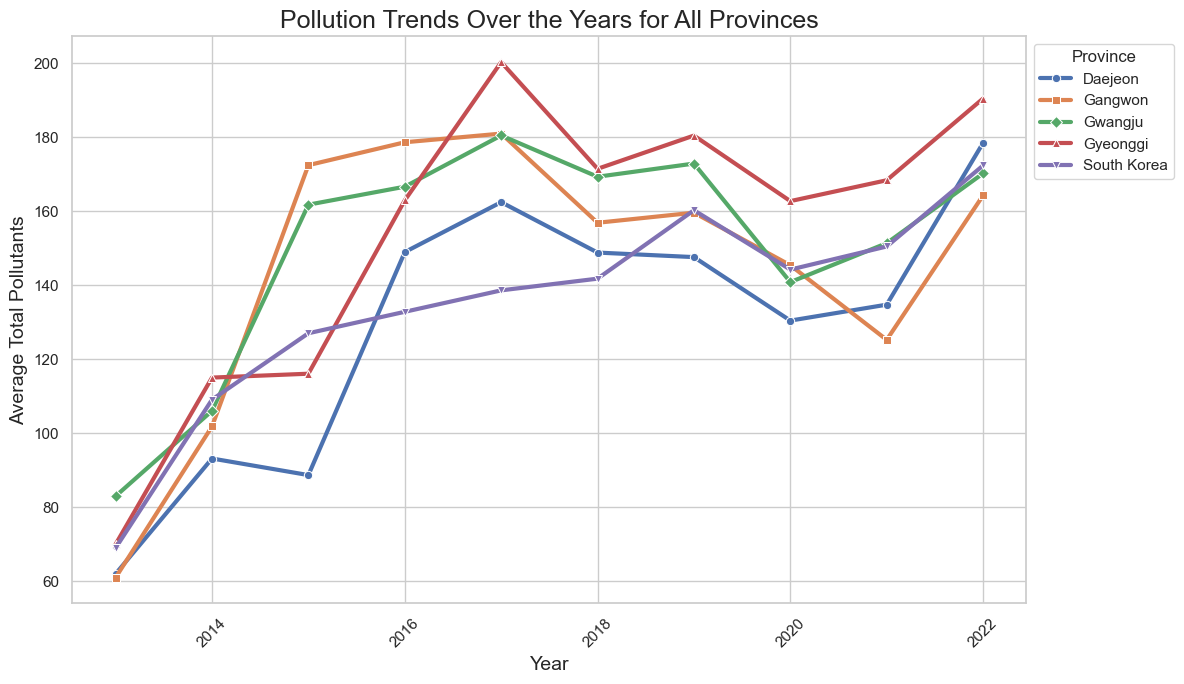

In [20]:
df['Total Pollutants'] = df[['PM2.5', 'PM10', 'O3', 'NO2', 'SO2', 'CO']].sum(axis=1)

sns.set_theme(style="whitegrid", palette="deep")

df['Year'] = pd.to_datetime(df['Date']).dt.year
pollution_by_province_year = df.groupby(['Year', 'Province'])['Total Pollutants'].mean().reset_index()

provinces_of_interest = ['Daejeon', 'Gangwon', 'Gwangju', 'Gyeonggi', 'South Korea']  
filtered_provinces = pollution_by_province_year[pollution_by_province_year['Province'].isin(provinces_of_interest)]

plt.figure(figsize=(12, 7))
sns.lineplot(data=filtered_provinces, x='Year', y='Total Pollutants', hue='Province', 
             style='Province', dashes=False, linewidth=3, markers=["o", "s", "D", "^", "v"])

plt.title('Pollution Trends Over the Years for All Provinces', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Total Pollutants', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Province', loc='upper left', bbox_to_anchor=(1, 1)) 
plt.grid(True)

plt.tight_layout()
plt.show()


4. Create a user-initiated plot that shows the mean pollution data for a user-specified city, district, province, and year.

Please select a province:
1. Gangwon
2. Gwangju
3. Gyeonggi
4. Daejeon
5. South Korea
Please select a district:
1. Chuncheon-Si
Please select a city:
1. Jungang-Way
Please select a year:
1. 2013
2. 2014
3. 2015
4. 2016
5. 2017
6. 2018
7. 2019
8. 2020
9. 2021
10. 2022


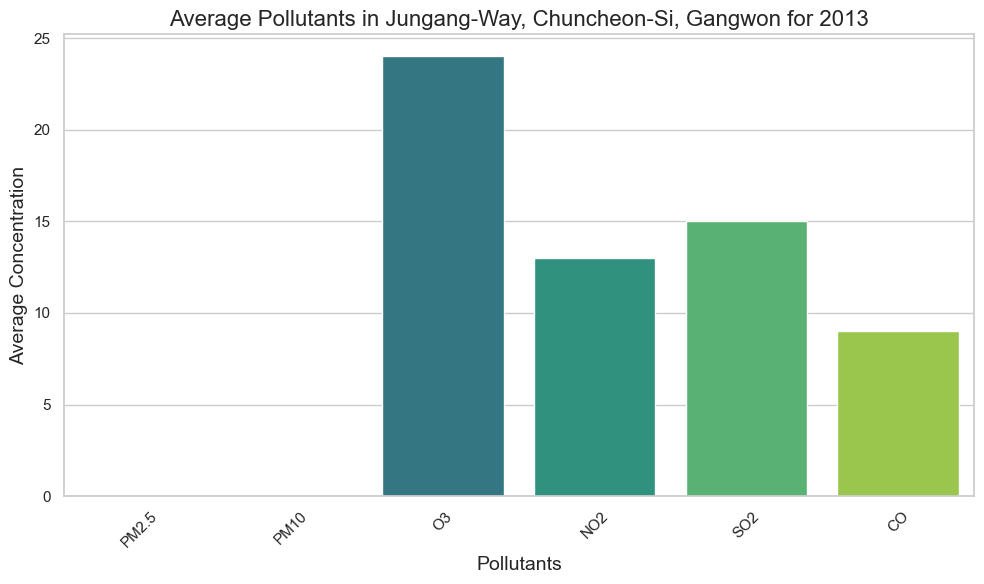

In [21]:
def get_user_input(options, label):
    print(f"Please select a {label}:")
    for i, option in enumerate(options, start=1):
        print(f"{i}. {option}")
    
    choice = int(input(f"Enter the number corresponding to your choice for {label}: ")) - 1
    return options[choice]

provinces = df['Province'].unique()
selected_province = get_user_input(provinces, 'province')
districts = df[df['Province'] == selected_province]['District'].unique()
selected_district = get_user_input(districts, 'district')
cities = df[df['District'] == selected_district]['City'].unique()
selected_city = get_user_input(cities, 'city')
available_years = df[(df['District'] == selected_district) & (df['City'] == selected_city)]['Year'].unique()
selected_year = get_user_input(available_years, 'year')
filtered_df = df[(df['Year'] == selected_year) &
                 (df['Province'] == selected_province) &
                 (df['District'] == selected_district) &
                 (df['City'] == selected_city)]


pollutants = ['PM2.5', 'PM10', 'O3', 'NO2', 'SO2', 'CO']
pollutants_mean = filtered_df[pollutants].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=pollutants_mean.index, y=pollutants_mean.values,hue=pollutants_mean.index ,palette="viridis", legend=False)

plt.title(f'Average Pollutants in {selected_city}, {selected_district}, {selected_province} for {selected_year}', fontsize=16)
plt.xlabel('Pollutants', fontsize=14)
plt.ylabel('Average Concentration', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

5. Plot a pie chart showing the breakdown of pollution by each province for the latest year.

   Province  Total Pollutants  Percentage
    Daejeon        178.490196       20.38
    Gangwon        164.294118       18.76
    Gwangju        170.235294       19.44
   Gyeonggi        190.470588       21.75
South Korea        172.374324       19.68


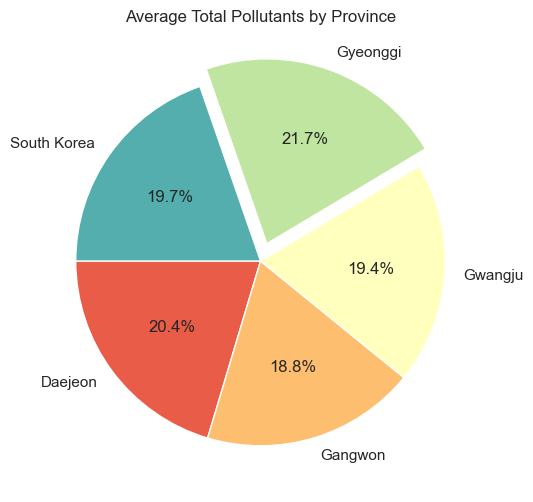

In [22]:
df['Total Pollutants']=df[['PM2.5','PM10','O3','NO2','SO2','CO']].sum(axis=1)
# print(df.head().to_string())

df_22=df[df['Year']==2022]
# print(df_22.head())

df_pro_22=df_22.groupby(['Province'])['Total Pollutants'].mean().reset_index()
df_pro_22['Percentage']=((df_pro_22['Total Pollutants']/df_pro_22['Total Pollutants'].sum())*100).round(2)
print(df_pro_22.to_string(index=False))

provinces = df_pro_22['Province']
pollutants = df_pro_22['Total Pollutants']
colors = sns.color_palette("Spectral", len(provinces))
explode = [0, 0, 0, 0.1, 0]

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(pollutants, labels=provinces, colors=colors, explode=explode, 
        autopct='%1.1f%%', startangle=180)
plt.title("Average Total Pollutants by Province")
plt.show()

6. What is the pollutant composition for the entire country? Plot a suitable graph to show it.

Pollutant  Mean Concentration
    PM2.5           53.224616
     PM10           34.757428
       O3           34.506371
      NO2           14.802114
       CO            4.548422
      SO2            3.553084


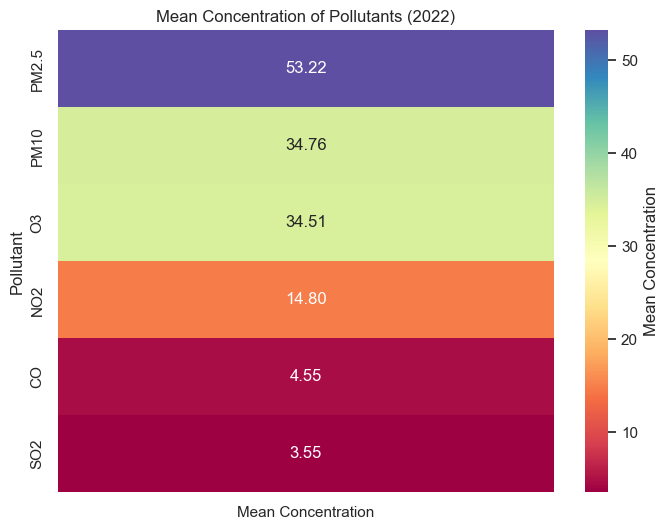

In [23]:
pollutants=df[['PM2.5','PM10','NO2','SO2','O3','CO']]
zero_counts = (pollutants == 0).sum()
# print(zero_counts)

concentration_of_pollutants=pollutants.mean().reset_index()
concentration_of_pollutants.columns = ['Pollutant', 'Mean Concentration']
concentration_of_pollutants.sort_values(by='Mean Concentration',inplace=True,ascending=False)
print(concentration_of_pollutants.to_string(index=False))


plt.figure(figsize=(8, 6))
sns.heatmap(concentration_of_pollutants.set_index('Pollutant'), annot=True, fmt=".2f", cmap='Spectral', cbar_kws={'label': 'Mean Concentration'})
plt.title('Mean Concentration of Pollutants (2022)')
plt.ylabel('Pollutant')
plt.show()

7. Show the history of pollution in the least polluted city.

        Month      PM2.5       PM10         O3       SO2        CO  Total Pollutants
0     January  72.198556  41.209386  14.317690  7.700361  7.472924        179.974729
1    February  75.772358  43.463415  20.516260  7.235772  6.638211        189.739837
2       March  83.105263  49.238866  29.651822  6.587045  6.178138        208.838057
3       April  65.991667  43.870833  40.025000  5.550000  5.150000        189.837500
4         May  68.745968  44.536290  47.592742  5.649194  4.584677        196.189516
5        June  67.670833  36.170833  51.895833  5.133333  4.070833        187.529167
6        July  50.847826  27.986957  41.221739  4.886957  3.717391        147.891304
7      August  57.645740  26.085202  37.825112  4.816143  3.784753        149.937220
8   September  53.081633  25.806122  32.994898  4.698980  4.234694        143.290816
9     October  60.266129  31.463710  23.508065  5.245968  5.548387        155.237903
10   November  74.429167  37.845833  15.858333  6.179167  6.88750

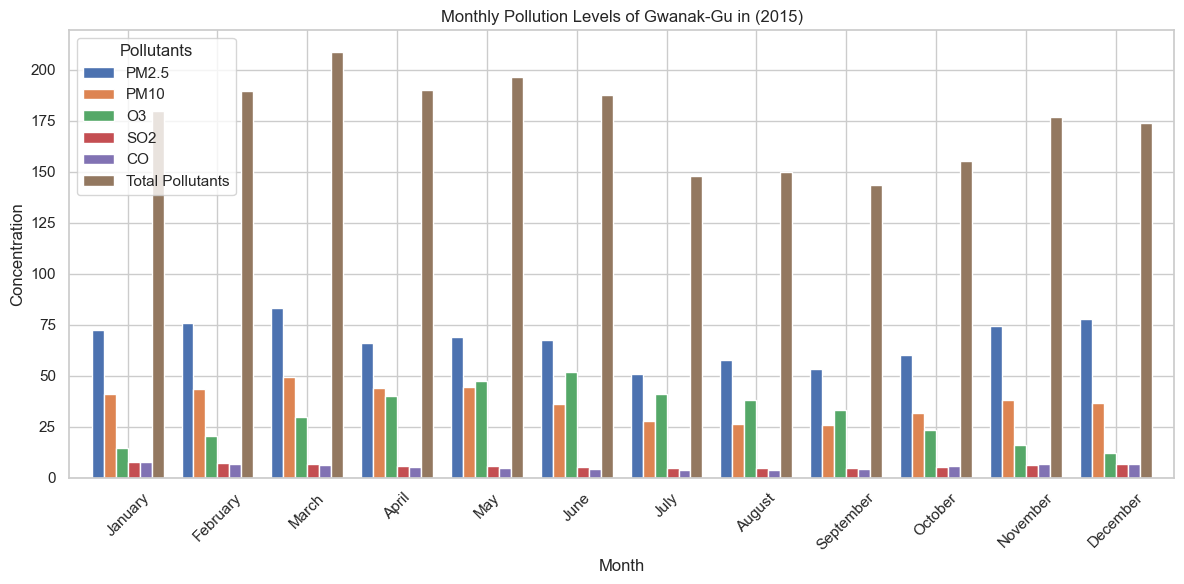

In [24]:
# Grouping and aggregating the data
df_pollution = df.groupby('City').agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'O3': 'mean',
    'SO2': 'mean',
    'CO': 'mean',
    'Total Pollutants': 'mean'
}).reset_index()

df_pollution.sort_values(by='Total Pollutants', inplace=True, ascending=False)
least_polluted_city = df_pollution['City'].iloc[0]
least_df = df[(df['City'] == 'Gwanak-Gu') ].copy()
# print(least_df.dtypes)

least_df['Date'] = pd.to_datetime(least_df['Date'], errors='coerce')
least_df.loc[:, 'Month'] = least_df['Date'].dt.month
# print(least_df.dtypes)

least_df_sorted = least_df.sort_values(by='Month', ascending=True).reset_index(drop=True)
# print(least_df_sorted[['Date', 'Month', 'Total Pollutants']].head())

least_grouped = least_df_sorted.groupby('Month').agg({
    'PM2.5': 'mean',
    'PM10': 'mean',
    'O3': 'mean',
    'SO2': 'mean',
    'CO': 'mean',
    'Total Pollutants': 'mean'
}).reset_index()
# print(least_grouped.to_string())

reverse_month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}
least_grouped['Month'] = least_grouped['Month'].map(reverse_month_mapping)
print(least_grouped.to_string())

least_grouped.plot(x='Month', kind='bar', figsize=(12, 6), width=0.8)

plt.title(f'Monthly Pollution Levels of {least_polluted_city} in (2015)')
plt.xlabel('Month')
plt.ylabel('Concentration')
plt.xticks(rotation=45)
plt.legend(title='Pollutants')
plt.tight_layout()
plt.show()



8. Visualize the average seasonal and monthly changes in pollutants across the country.

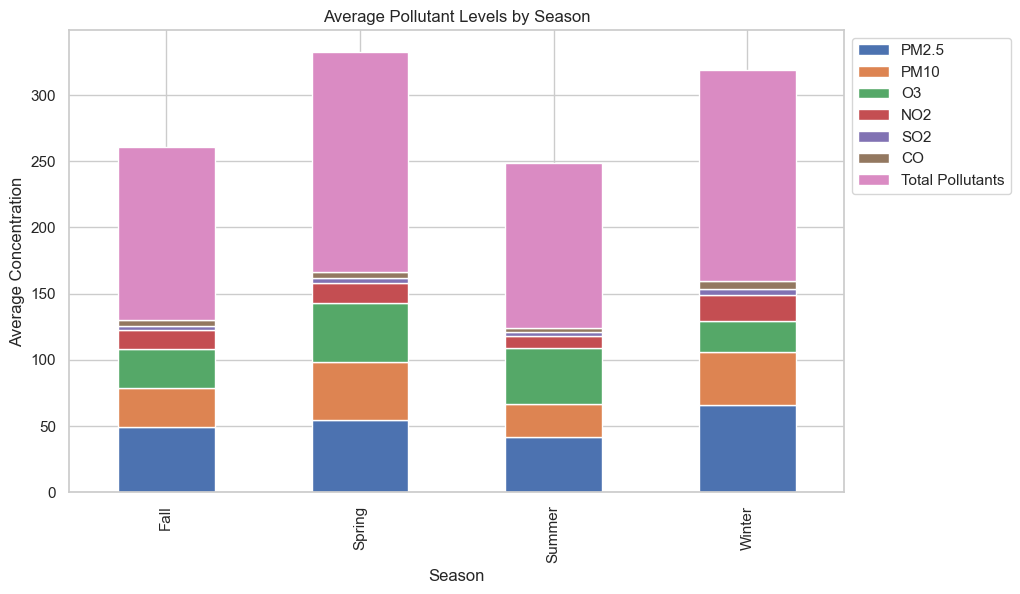

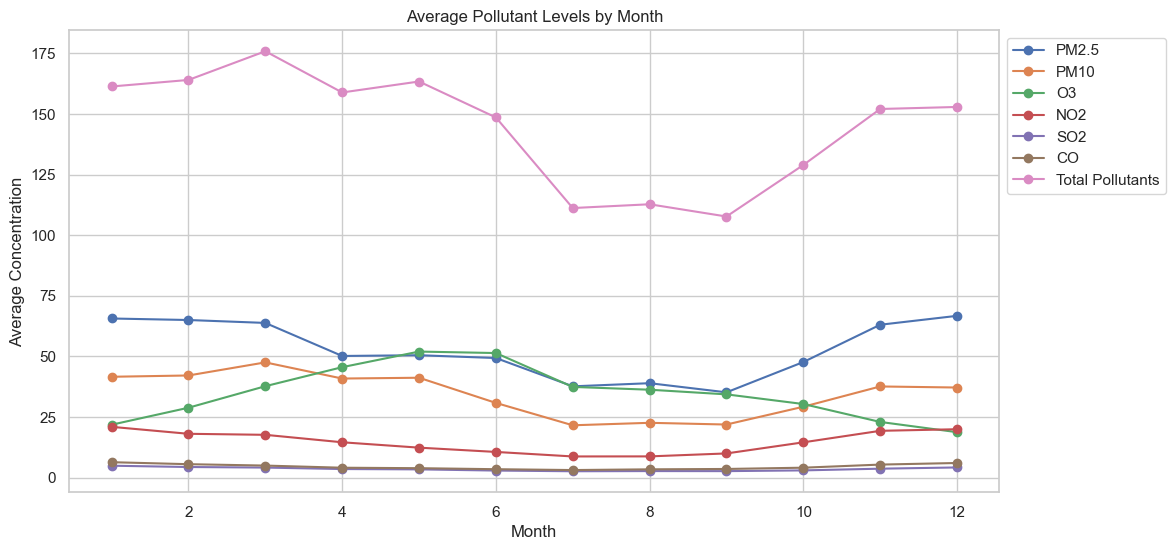

In [25]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
df['Season'] = df['Month'].apply(get_season)

seasonal_data = df.groupby('Season')[['PM2.5', 'PM10', 'O3', 'NO2', 'SO2', 'CO', 'Total Pollutants']].mean()
monthly_data = df.groupby('Month')[['PM2.5', 'PM10', 'O3', 'NO2', 'SO2', 'CO', 'Total Pollutants']].mean()

ax1 = seasonal_data.plot(kind='bar', stacked=True, figsize=(10, 6))
ax1.set_title('Average Pollutant Levels by Season')
ax1.set_ylabel('Average Concentration')
ax1.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

ax2 = monthly_data.plot(kind='line', marker='o', figsize=(12, 6))
ax2.set_title('Average Pollutant Levels by Month')
ax2.set_xlabel('Month')
ax2.set_ylabel('Average Concentration')
ax2.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.show()

9. How do average pollution levels vary across different provinces,districts and cities for each pollutant? Show these as heatmaps.

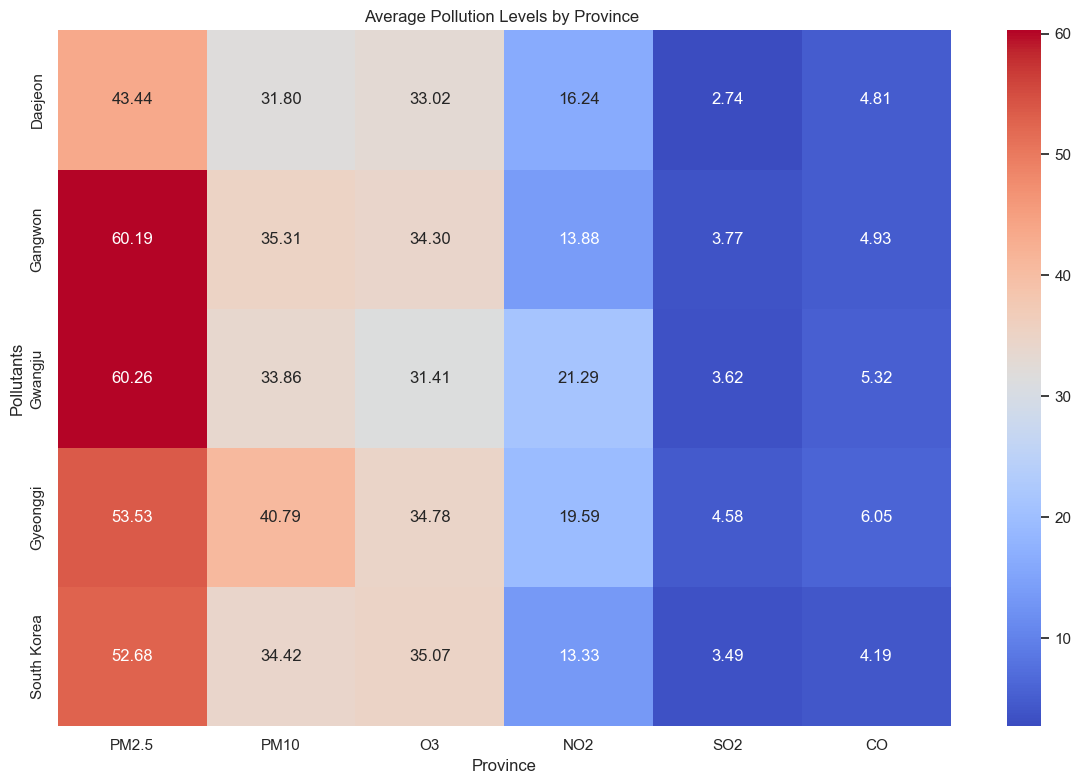

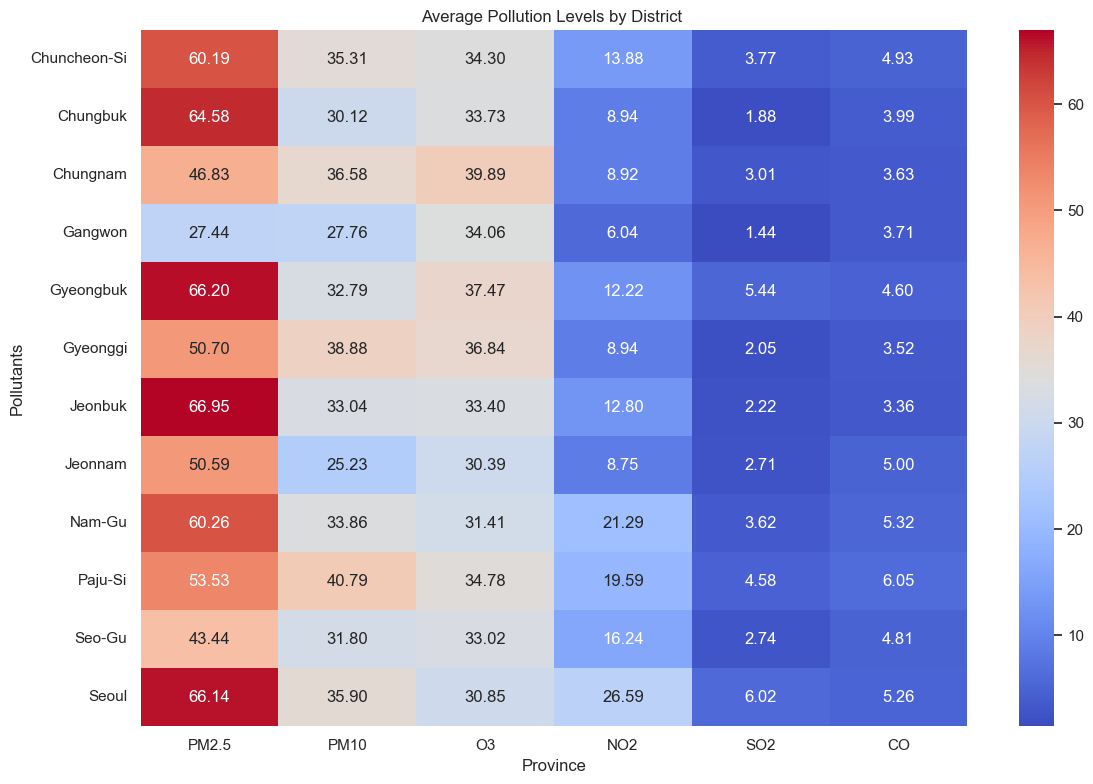

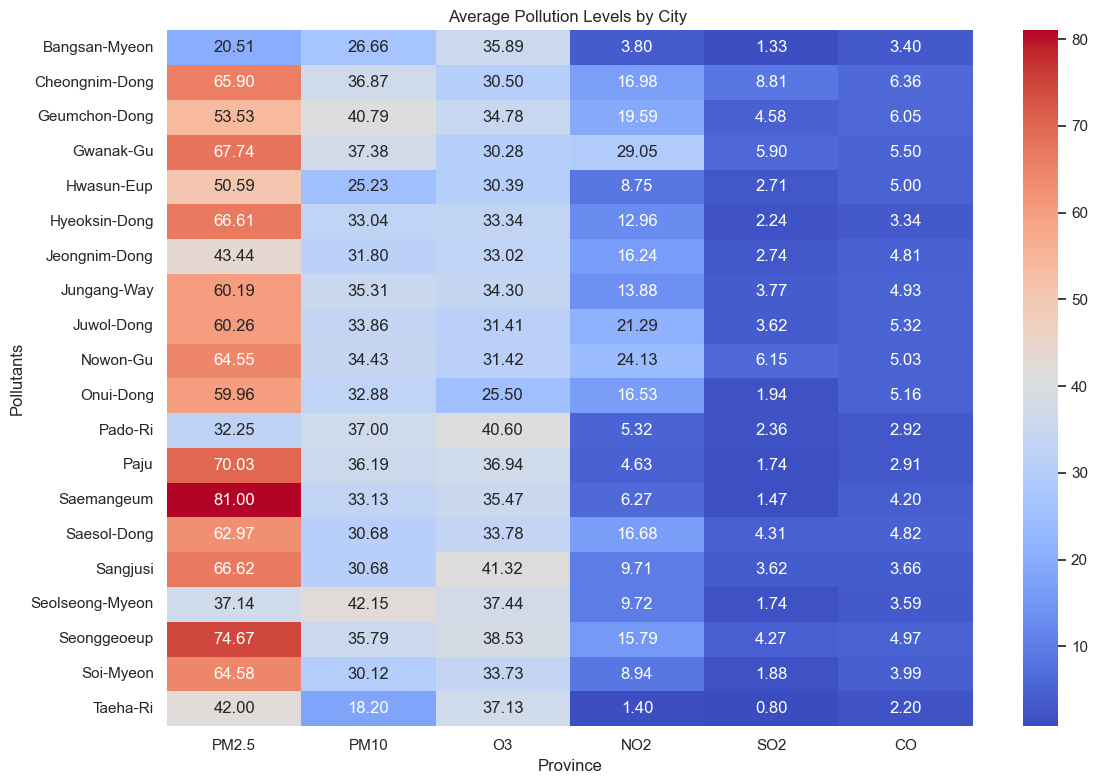

In [26]:
pollution_summary = df.groupby('Province')[['PM2.5', 'PM10', 'O3', 'NO2', 'SO2', 'CO']].mean()

plt.figure(figsize=(12, 8))
sns.heatmap(pollution_summary, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Average Pollution Levels by Province ')
plt.xlabel('Province')
plt.ylabel('Pollutants')
plt.tight_layout()
plt.show()

pollution_summary = df.groupby('District')[['PM2.5', 'PM10', 'O3', 'NO2', 'SO2', 'CO']].mean()

plt.figure(figsize=(12, 8))
sns.heatmap(pollution_summary, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Average Pollution Levels by District ')
plt.xlabel('Province')
plt.ylabel('Pollutants')
plt.tight_layout()
plt.show()

pollution_summary = df.groupby('City')[['PM2.5', 'PM10', 'O3', 'NO2', 'SO2', 'CO']].mean()

plt.figure(figsize=(12, 8))
sns.heatmap(pollution_summary, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Average Pollution Levels by City ')
plt.xlabel('Province')
plt.ylabel('Pollutants')
plt.tight_layout()
plt.show()

10. What is the distribution of PM2.5, PM10, O3, NO2, SO2, and CO levels in the most polluted city during the most polluted year?

The most polluted year is 2022 with an average Total Pollutants level of 173.1302966101695.
The most polluted city in 2022 is Seonggeoeup with an average Total Pollutants level of 202.33333333333334.


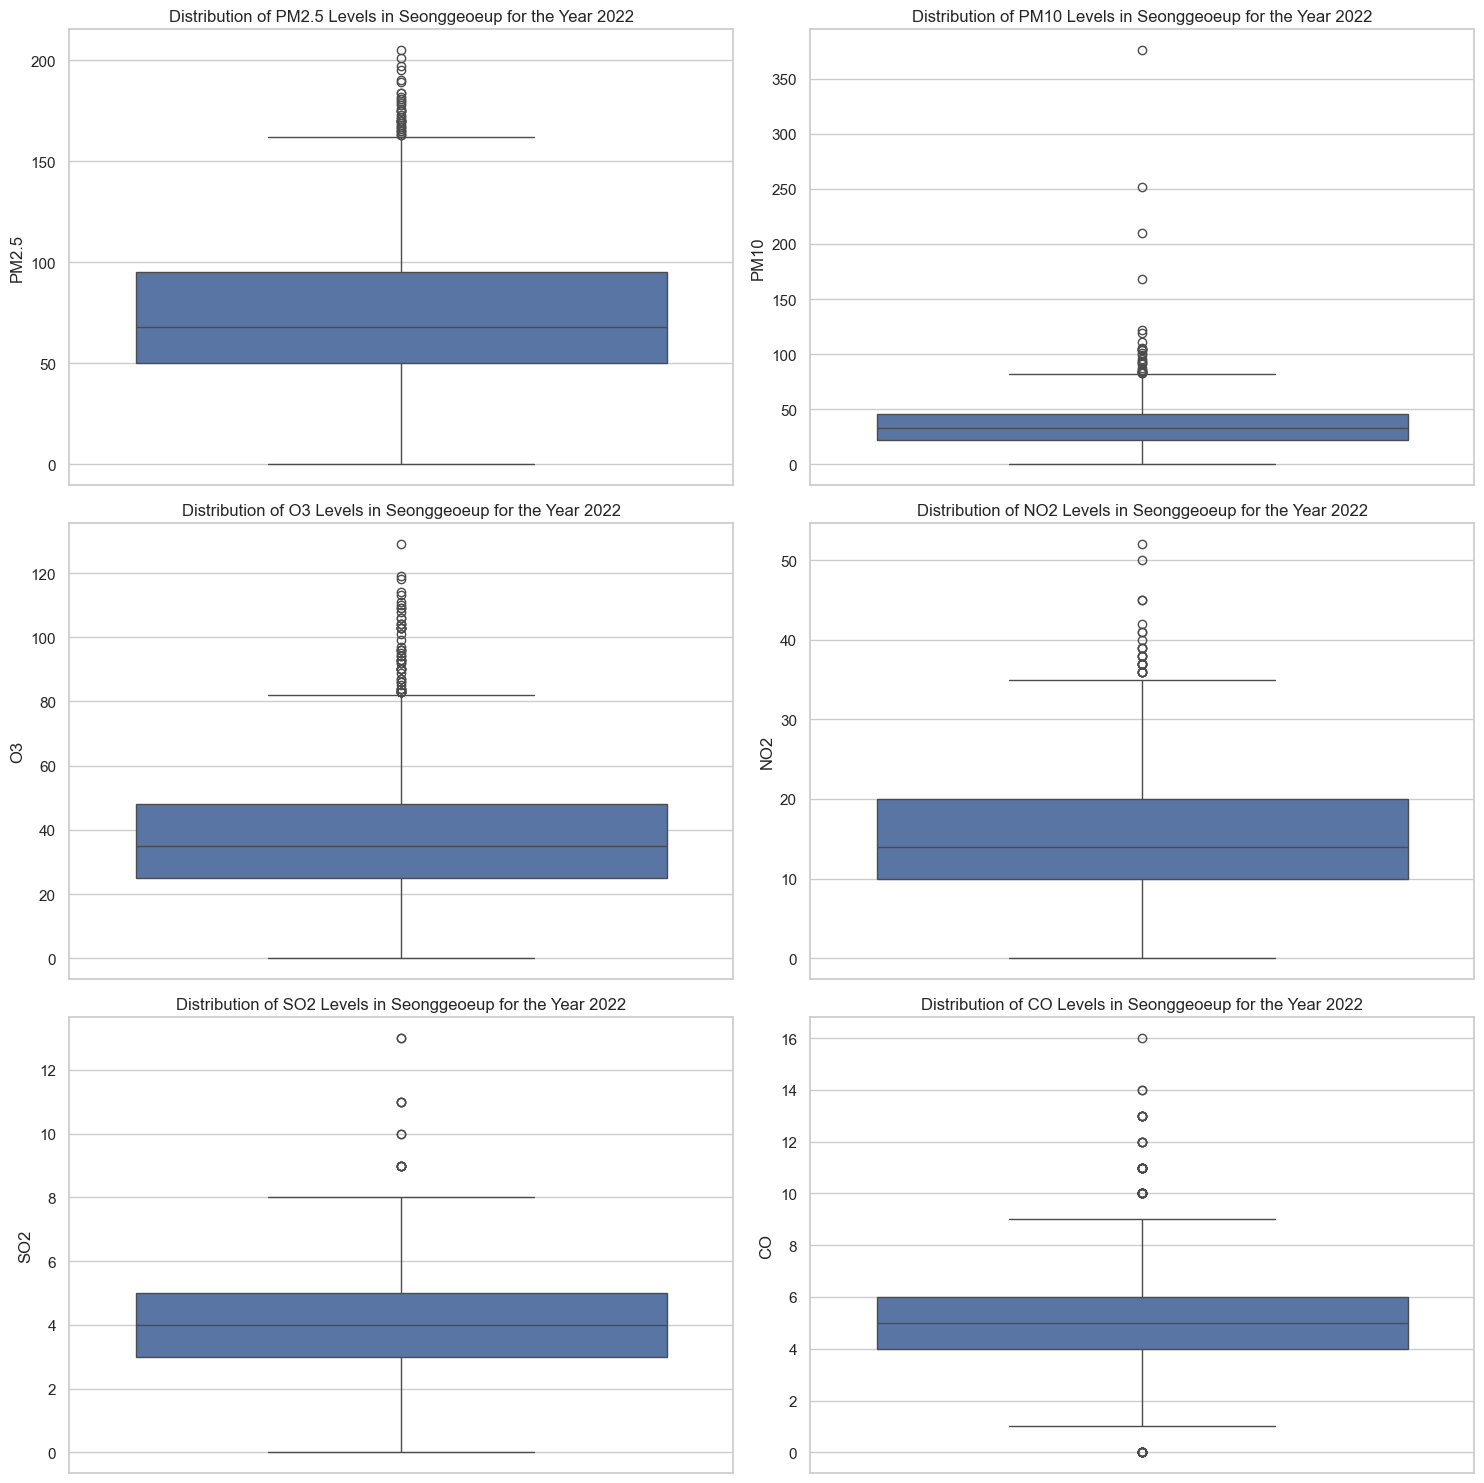

In [27]:
df['Total Pollutants'] = df[['PM2.5', 'PM10', 'O3', 'NO2', 'SO2', 'CO']].sum(axis=1)
yearly_pollution = df.groupby('Year')['Total Pollutants'].mean()
most_polluted_year = yearly_pollution.idxmax()
most_polluted_year_value = yearly_pollution.max()
print(f"The most polluted year is {most_polluted_year} with an average Total Pollutants level of {most_polluted_year_value}.")

pollution_in_year = df[df['Year'] == most_polluted_year]
most_polluted_city = pollution_in_year.groupby('City')['Total Pollutants'].mean().idxmax()
most_polluted_city_value = pollution_in_year.groupby('City')['Total Pollutants'].mean().max()
print(f"The most polluted city in {most_polluted_year} is {most_polluted_city} with an average Total Pollutants level of {most_polluted_city_value}.")

city_data = df[df['City'] == most_polluted_city]
pollutants = ['PM2.5', 'PM10', 'O3', 'NO2', 'SO2', 'CO']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))  
axes = axes.flatten()

for i, pollutant in enumerate(pollutants):
    sns.boxplot(data=city_data, y=pollutant, ax=axes[i])
    axes[i].set_title(f'Distribution of {pollutant} Levels in {most_polluted_city} for the Year {most_polluted_year}')
    axes[i].set_ylabel(pollutant)

for j in range(len(pollutants), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Conclusion

In this exploratory data analysis, we examined pollution trends across various seasons and months, uncovering significant fluctuations that suggest seasonal or weather-related influences on pollutant levels. Visualizations highlighted certain months with elevated pollution, offering insights into temporal dynamics of air quality. Although the analysis provides a broad understanding of pollutant trends, the absence of urban versus rural classifications limited our ability to explore area-specific impacts. Overall, these findings lay the groundwork for more focused research, and incorporating additional data, such as urban-rural distinctions or pollutant sources, would enhance the insights for better environmental management and policy-making.